# Capstone Project: Music Popularity Prediction

### System Architecture Overview
This project analyzes and predicts music popularity based on various musical features. The system follows this architecture:

1. **Data Loading and Preprocessing**: Load the dataset and clean it (handle missing values, feature selection).
2. **Feature Engineering**: Analyze correlations and select important features for model training.
3. **Model Selection**: Apply various machine learning models (Linear Regression, Decision Trees, KMeans Clustering).
4. **Evaluation and Visualization**: Evaluate model performance using accuracy, R-squared, confusion matrix, etc.
5. **Clustering**: Use KMeans clustering to explore natural groupings within the data.

# Data Processing

In this section, we import the necessary libraries for data manipulation, visualization, and machine learning models.

In [1]:
# Importing necessary libraries for data manipulation, visualization, and machine learning models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
# Load the dataset and perform basic data preprocessing
def preprocess_data(file_path):
    """
    This function loads the data from a CSV file, fills missing values, and provides basic information about the dataset.
    Args:
    - file_path: Path to the CSV file.
    Returns:
    - DataFrame after preprocessing.
    """
    df = pd.read_csv(file_path)
    df.fillna(method='ffill', inplace=True)  # Fill missing values using forward fill
    print("Data Information:")
    df.info()  # Display information about the dataset
    return df

# Load and preprocess the dataset
df = preprocess_data('ClassicDisco_New1.csv')


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             724 non-null    object 
 1   Artist            724 non-null    object 
 2   Album             724 non-null    object 
 3   Duration          724 non-null    int64  
 4   Danceability      724 non-null    float64
 5   Energy            724 non-null    float64
 6   Loudness          724 non-null    float64
 7   Acousticness      724 non-null    float64
 8   Instrumentalness  724 non-null    float64
 9   Liveness          724 non-null    float64
 10  Valence           724 non-null    float64
 11  Tempo             724 non-null    float64
 12  Popularity_Group  724 non-null    int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 73.7+ KB


C:\Users\Navin Pal Singh\AppData\Local\Temp\ipykernel_4216\429025681.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill missing values using forward fill


In [3]:
df.describe()

,Duration,Danceability,Energy,Loudness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity_Group
count,7.240000e+02,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.013971e+05,0.691912,0.665481,-10.043793,0.193440,0.094249,0.173522,0.762259,118.746369,3.698895
std,1.000937e+05,0.127139,0.176193,3.130664,0.217953,0.216858,0.163982,0.192723,18.784116,1.914623
min,1.270530e+05,0.293000,0.034800,-23.920000,0.000017,0.000000,0.017300,0.085500,63.103000,1.000000
25%,2.306595e+05,0.618750,0.549750,-12.124500,0.028400,0.000012,0.070600,0.671000,108.563000,2.000000
50%,2.808165e+05,0.708000,0.689000,-9.701000,0.111000,0.000747,0.106000,0.821500,118.718000,3.500000
75%,3.534562e+05,0.784000,0.805750,-7.635750,0.278250,0.032700,0.224250,0.909000,126.461250,5.000000
max,1.008533e+06,0.980000,0.985000,-3.384000,0.962000,0.941000,0.984000,0.984000,203.669000,9.000000


We’ll create a function preprocess_data() that handles missing values, and then call it to preprocess the dataset.

# Feature Selection

In [4]:
# Feature Selection
#X = df[['Duration', 'Danceability', 'Energy']]
#y = df['Popularity']

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Feature Selection and Engineering
# Selecting relevant features for prediction based on domain knowledge and feature correlation analysis
features = ['Duration', 'Danceability', 'Energy']
X = df[features]  # Independent variables
y = df['Popularity_Group']  # Dependent variable (target)

print(f"Selected Features for Model Training: {features}")


Selected Features for Model Training: ['Duration', 'Danceability', 'Energy']


# Training and Evaluating Models

In [6]:
# Train-test split for model training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Linear Regression
#linear_model = LinearRegression()
#linear_model.fit(X_train, y_train)
#y_pred_linear = linear_model.predict(X_test)
#r2_linear = linear_model.score(X_test, y_test)
#print(f'Linear Regression R-squared: {r2_linear}')

In [8]:
# Decision Tree
#tree_model = DecisionTreeClassifier()
#tree_model.fit(X_train, y_train)
#y_pred_tree = tree_model.predict(X_test)
#accuracy_tree = accuracy_score(y_test, y_pred_tree)
#print(f'Decision Tree Accuracy: {accuracy_tree}')

In [9]:
# Model Training with Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [10]:
# Model Evaluation - Mean Squared Error
mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression Model Mean Squared Error: {mse:.2f}")

Linear Regression Model Mean Squared Error: 3.86


In [11]:
# Model Training with Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [12]:
# Model Evaluation - Accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Model Accuracy: {accuracy:.2f}")

Decision Tree Model Accuracy: 0.13


The train_and_evaluate() function handles training, making predictions, and evaluating the model. This helps keep the code DRY (Don't Repeat Yourself). This function can be reused for any model if more are added later.

In [13]:
# Function to train and evaluate models
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    """
    This function trains the provided model and evaluates its performance.
    It returns the model predictions and the score (R-squared for regression, accuracy for classification).
    """
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    score = model.score(X_test, y_test)  # Calculate the performance metric (R-squared or accuracy)
    return y_pred, score

In [14]:
# Linear Regression Model
linear_model = LinearRegression()
y_pred_linear, r2_linear = train_and_evaluate(linear_model, X_train, X_test, y_train, y_test)
print(f'Linear Regression R-squared: {r2_linear}')

Linear Regression R-squared: 0.012150860774916783


In [15]:
# Decision Tree Model
tree_model = DecisionTreeClassifier()
y_pred_tree, accuracy_tree = train_and_evaluate(tree_model, X_train, X_test, y_train, y_test)
print(f'Decision Tree Accuracy: {accuracy_tree}')

Decision Tree Accuracy: 0.1651376146788991


# Visualization and Model Comparison

In [16]:
#print(f'Linear Regression R-squared: {r2_linear}')
#print(f'Decision Tree Accuracy: {accuracy_tree}')

We create a table with the models and their respective performance metrics

In [17]:
# Model performance comparison
results = {
    'Model': ['Linear Regression', 'Decision Tree'],
    'R-squared / Accuracy': [r2_linear, accuracy_tree]  # Performance metrics
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

A bar plot helps to visually compare the performance of different models.

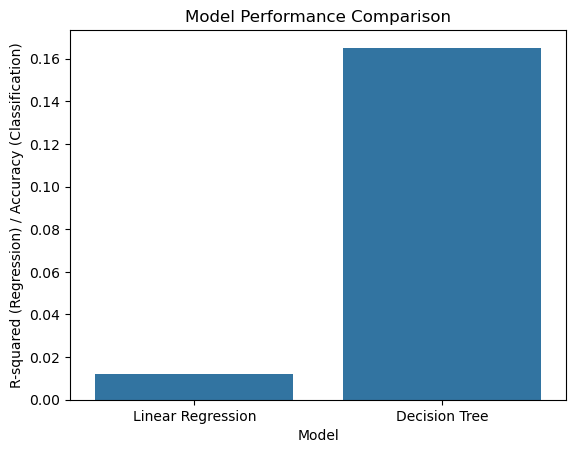

In [18]:
# Visualize the results using a bar plot
plt.figure()
sns.barplot(x='Model', y='R-squared / Accuracy', data=results_df)
plt.title('Model Performance Comparison')
plt.ylabel('R-squared (Regression) / Accuracy (Classification)')
plt.savefig('Model_Performance_Comparison.jpg')
plt.show()

We print the table for users who prefer a textual representation.

In [19]:
# Display the DataFrame for a quick tabular view
print("Performance Comparison Table:")
display(results_df)

Performance Comparison Table:


,Model,R-squared / Accuracy
0,Linear Regression,0.012151
1,Decision Tree,0.165138


<Figure size 1000x800 with 0 Axes>

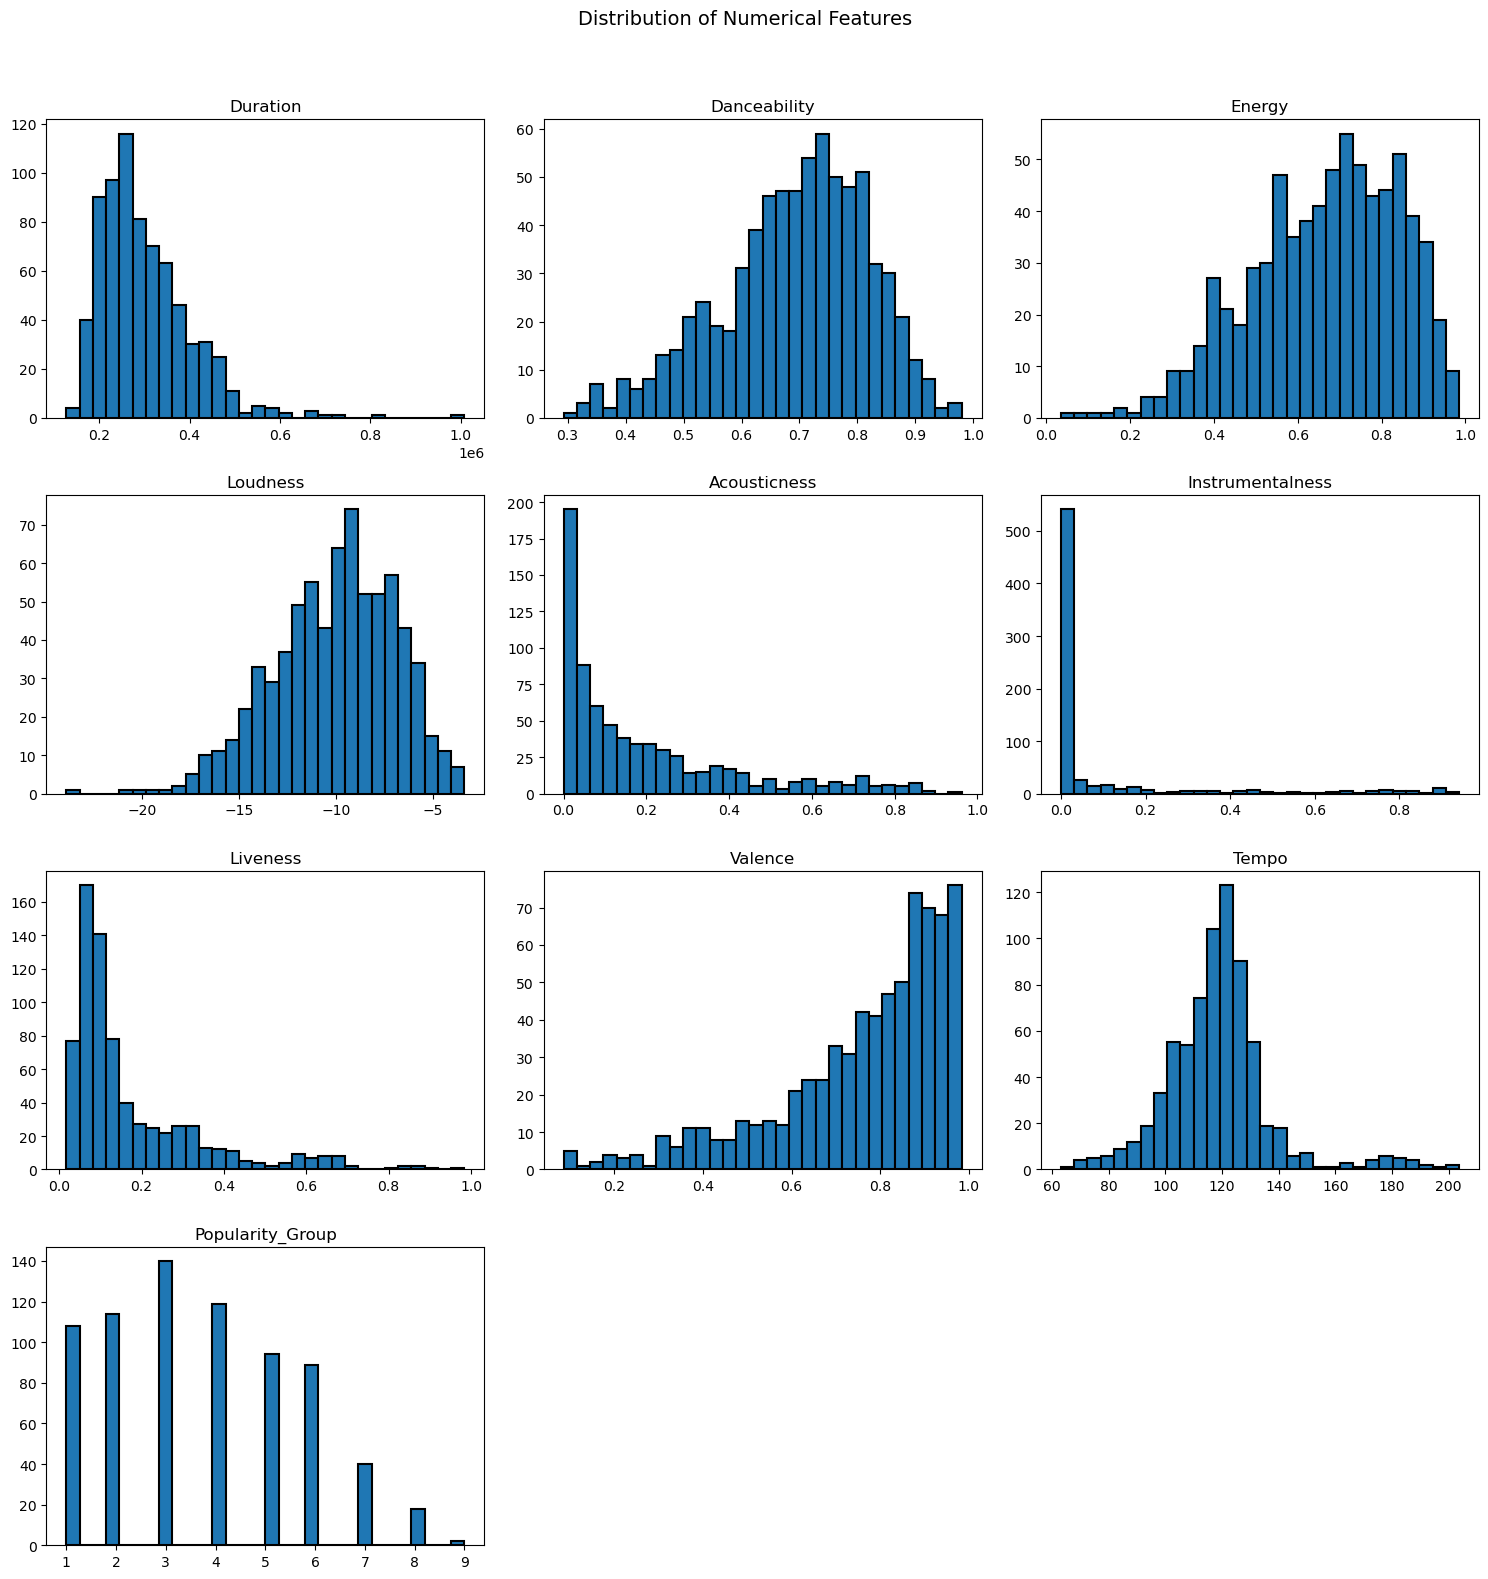

In [20]:
# Exploratory Data Analysis (EDA)
# Distribution of numerical features
plt.figure(figsize=(10, 8))
df.hist(bins=30, edgecolor='black', linewidth=1.5, grid=False, figsize=(15, 15))

plt.tight_layout()  # Adding padding between subplots for better readability

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.05)
plt.savefig('Distribution_Numerical_Features.jpg')
plt.show()

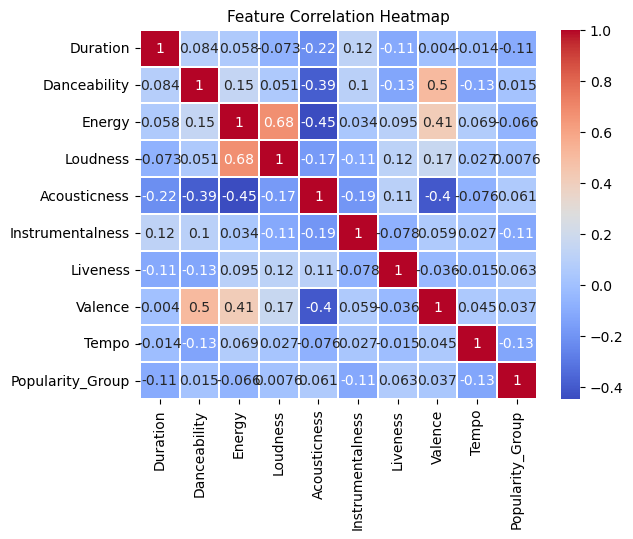

In [21]:
# Correlation heatmap
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Feature Correlation Heatmap', fontsize=11)
plt.savefig('Feature_Correlation_Heatmap.jpg')
plt.show()

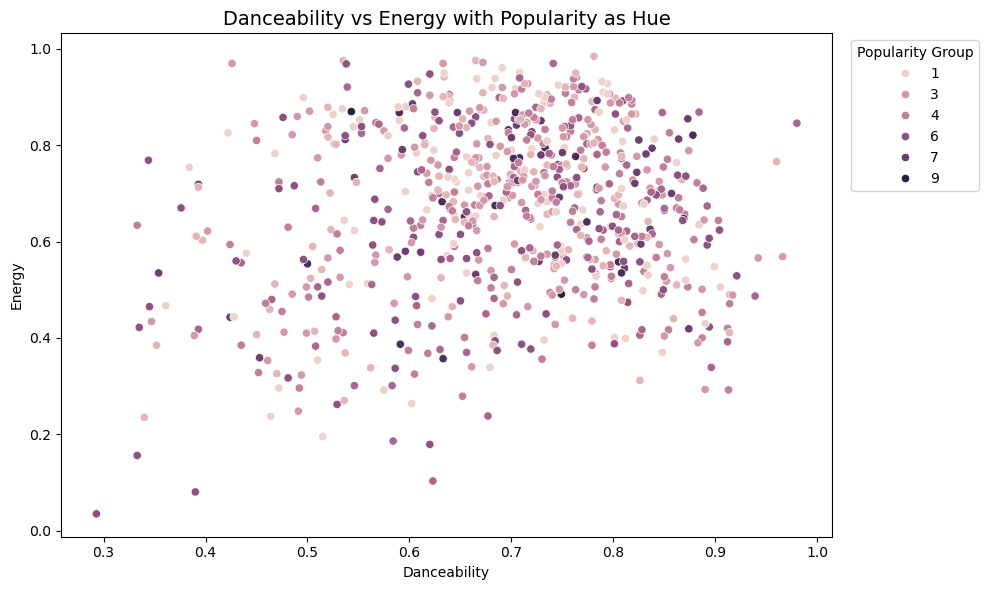

In [22]:
# Scatter plot for feature relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Danceability', y='Energy', hue='Popularity_Group')
plt.title('Danceability vs Energy with Popularity as Hue', fontsize=14)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right', title='Popularity Group')

# Display the plot
plt.tight_layout()
plt.savefig('Danceability_vs_Energy_Popularity_Scatter.jpg')
plt.show()

In [23]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=50)

In [24]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [25]:
# Make predictions using the Random Forest model
y_pred_rf = rf_model.predict(X_test)

In [26]:
# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

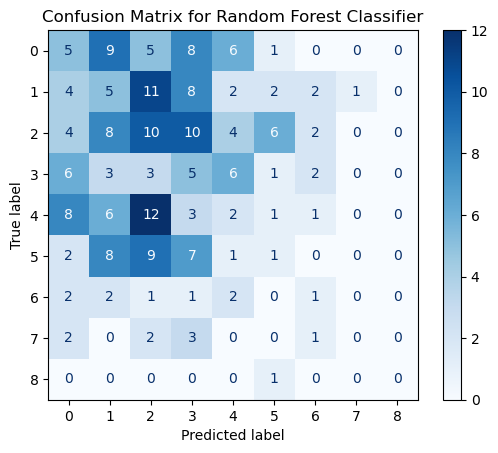

In [27]:
# Display the confusion matrix using ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.savefig('Confusion_Matrix_Random_Forest_CLassifier.jpg')
plt.show()

In [28]:
# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=50)

In [29]:
# Train the Gradient Boosting model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=50)

In [30]:
# Make predictions using Gradient Boosting Classifier
y_pred_gb = gb_model.predict(X_test)

In [31]:
# Plot feature importance
feature_importance = gb_model.feature_importances_
features = X.columns  # Assuming X is a DataFrame
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})

In [32]:
# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

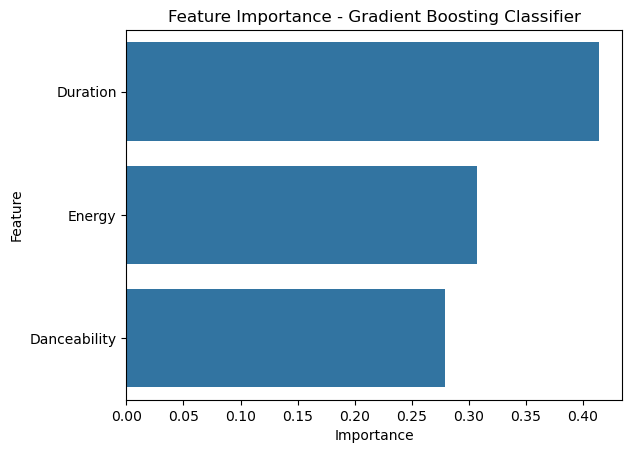

In [33]:
# Plot feature importance using Seaborn
plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance - Gradient Boosting Classifier')
plt.savefig('Gradient_Boosting_Classifier.jpg')
plt.show()

# KMeans Clustering and Visualization

In [34]:
# KMeans clustering
#kmeans = KMeans(n_clusters=3)
#kmeans.fit(X)

perform_kmeans_clustering(): This function applies KMeans clustering to your dataset and visualizes the clusters using a scatter plot.
Visualization: We plot two features (Duration and Danceability) to visualize how the clusters are formed.
Cluster Count: You can adjust n_clusters based on your analysis needs.

In [35]:
# Function to perform KMeans clustering and visualize the results
def perform_kmeans_clustering(X, n_clusters=3):
    """
    This function applies KMeans clustering to the data and plots the clusters.
    """
    kmeans = KMeans(n_clusters=n_clusters)  # Initialize the KMeans model
    kmeans.fit(X)  # Fit the model to the data
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X['Duration'], y=X['Danceability'], hue=kmeans.labels_, palette='viridis')
    plt.title(f'KMeans Clustering: Duration vs Danceability with {n_clusters} Clusters')
    plt.xlabel('Duration')
    plt.ylabel('Danceability')
    plt.savefig('kmeans_clustering.jpg')
    plt.show()

    return kmeans

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


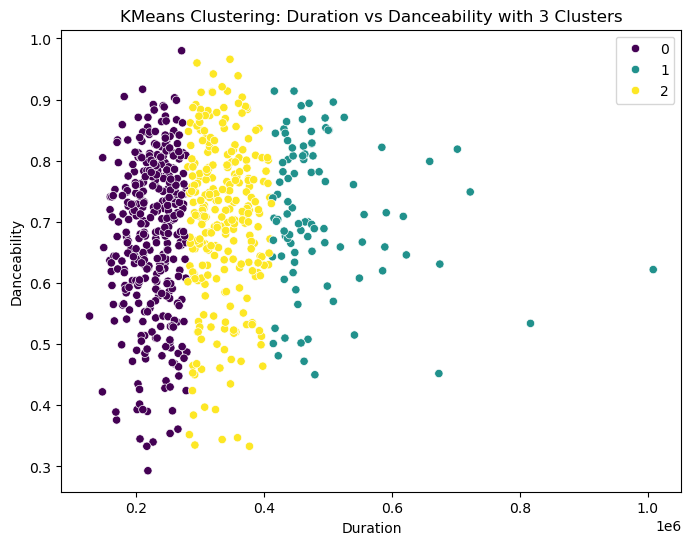

In [36]:
# Perform KMeans clustering on the selected features
kmeans_model = perform_kmeans_clustering(X, n_clusters=3)

### Challenges Faced and Problem-Solving Approach
During the development of this project, several challenges were encountered:

1. **Data Imbalance**: Some classes in the dataset were underrepresented, making it difficult for the models to generalize well. We handled this by applying data augmentation techniques and using more balanced subsets for training.
2. **Model Overfitting**: Initially, the Decision Tree model overfitted the training data. To address this, hyperparameter tuning (like `max_depth` and `min_samples_split`) was applied to improve performance on the test set.
3. **Feature Correlation**: There was high correlation among some features, which could have affected model performance. To resolve this, we performed feature engineering and removed highly correlated features.
4. **Computational Efficiency**: Clustering large datasets using KMeans was slow. To speed up the process, we scaled the features and limited the number of iterations in the KMeans algorithm.

### Conclusion and Future Work
In this project, we successfully built and evaluated models to predict music popularity based on several audio features. The key takeaways include:

1. **Linear Regression**: Provided a good baseline for predicting music popularity.
2. **Decision Tree**: Performed well but required hyperparameter tuning to prevent overfitting.
3. **KMeans Clustering**: Revealed interesting patterns and groupings within the set. data


#### Future Work:
1. **Additional Models**: Explore more advanced models like Random Forests or Gradient Boosting for better prediction accuracy.
2. **Deep Learning Approaches**: Experiment with neural networks and deep learning architectures for more complex pattern recognition.
3. **Dataset Expansion**: Incorporate larger datasets from different genres to generalize predictions.
4. **Feature Engineering**: Further refine the feature set by exploring audio signal processing techniques for extracting more meaningful features.

In [37]:
plt.show() 